In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt

from src.Tools.PlotSC import PlotSensitivityCurves
from src.Tools.TensorPowerSpec import PowSpecT

from src.GEFConstructor import CreateGEF



In [2]:
config = "Config/SchwingerGEF+beta25+Mass+KDepMix.py"

#Set path to the directory where the GEF results are stored
H = CreateGEF(config)

Nend = H.EndOfInflation()[0]


[61.01322827]


In [3]:
P = PowSpecT(H)

ks = np.logspace(np.log10(P.mink), np.log10(P.maxk), 50)


[61.01322827]
61.01322827232637


In [4]:
PT = P.ComputePowSpec(ks, ModePath=H.ModeData)

ind+,++
ind+,+-
ind+,--
ind-,++
ind-,+-
ind-,--


In [5]:
aH = H.vals["a"]*H.vals["H"]
PTAnalytic = P.PTAnalytical()

fs = P.ktofreq(ks)
faH = P.ktofreq(aH)

OmegaGW = P.PTtoOmega(PT["tot"], ks)
OmegaGWAnalytic = P.PTtoOmega(P.PTAnalytical()["tot"], aH)

['IPTA', 'BBO', 'NANOGrav', 'HL', 'SKA', 'PPTA', 'NANOGrav', 'ET', 'CE', 'DECIGO', 'EPTA', 'HLVK', 'LISA', 'HLVO2', 'HLV']


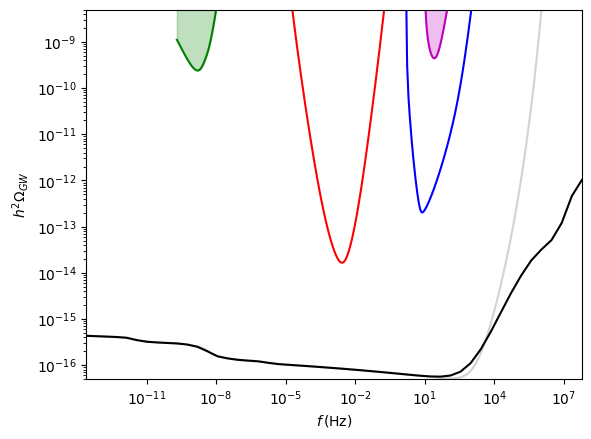

In [6]:

limy = (5e-17, 5e-9)# max(OmegaGW))
limx = (min(fs), max(fs))

fig, ax = plt.subplots(1,1)


ax.plot(faH, OmegaGWAnalytic, "lightgray")
ax.plot(fs, OmegaGW, "k")
PlotSensitivityCurves(ax, ["LISA", "ET", "NANOGrav", "HLVK"], ["r", "b", "g", "m", "y", "c"])
ax.set_xlim(limx)
ax.set_ylim(limy)

ax.set_ylabel("$h^2 \Omega_{GW}$")
ax.set_xlabel(r"$f\,({\rm Hz})$")
ax.set_yscale("log")
ax.set_xscale("log")
#plt.savefig(f"../Plots/OmegaGW_beta{beta}_SE.png")
plt.show()